# Project 3: Battery Equivalent Circuit Model Design
>**Date Created**: 19 February 2024<br>
>**Course**: AEM566 - Optimal Estimation<br>
>**Author**: Benjamin Lucke<br>

In [103]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import trapezoid, simpson

### 1. Load the battery data for the pulse discharge tests in the accompanying CSV file

In [104]:
data = pd.read_csv('data/pulse_discharge_test_data.csv')

# rename columns to make easier to reference and convert times to datetime for convenience
columnMapper = dict(zip(data.columns.values,['t', 'v', 'i'],)) 
data = data.rename(columns=columnMapper)
data['t'] = pd.to_datetime(data['t'],format="%H:%M:%S")
data.head()

,t,v,i
0,1900-01-01 07:49:26,26.3467,0.012093
1,1900-01-01 07:49:36,26.3484,0.013611
2,1900-01-01 07:49:46,26.3477,0.025167
3,1900-01-01 07:49:56,26.3483,0.030908
4,1900-01-01 07:50:06,26.3471,0.028649


### 2. Numerically integrate the current to obtain the SOC for the entire data set

In [105]:
soc_full = simpson(data['i'], dx = 10)

### 3. Partition the data into each rest period using the current measurement as the trigger

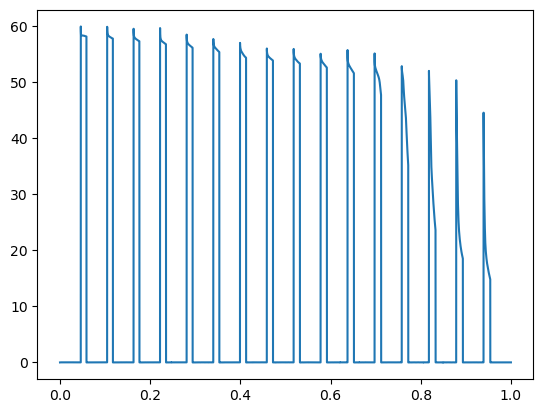

In [109]:
plt.plot(np.linspace(0, 1, len(data['i'])), data['i'])

In [228]:
delta_indices = data[data['i_diff'] >= .1].index.tolist()
partitions = [delta_indices[k:k+3] for k in range(0, len(delta_indices), 3)]
display(partitions)

[[362, 821, 1281],
 [1742, 2205, 2669],
 [3134, 3601, 4068],
 [4537, 5006, 5477],
 [5950, 6423, 6898],
 [7374]]

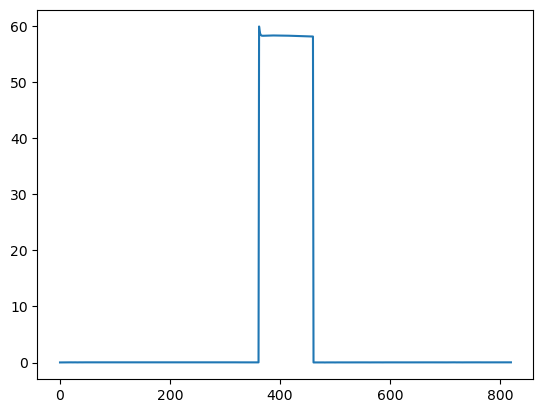

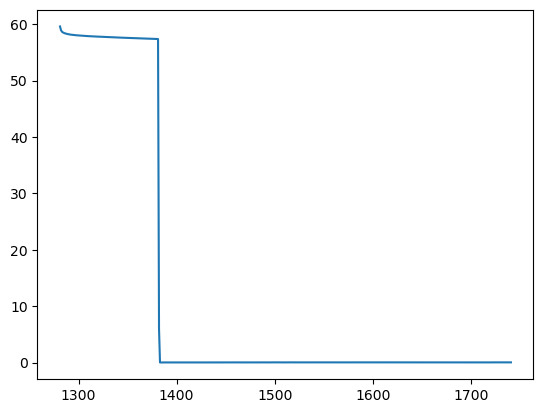

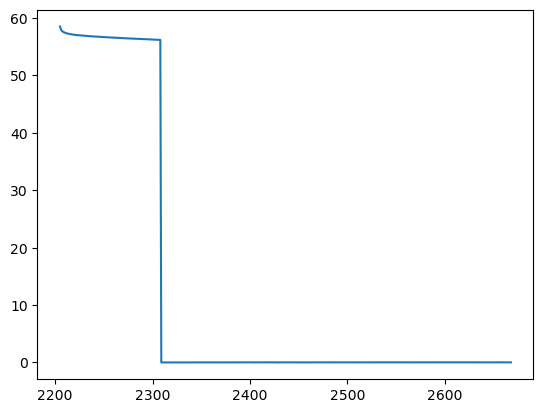

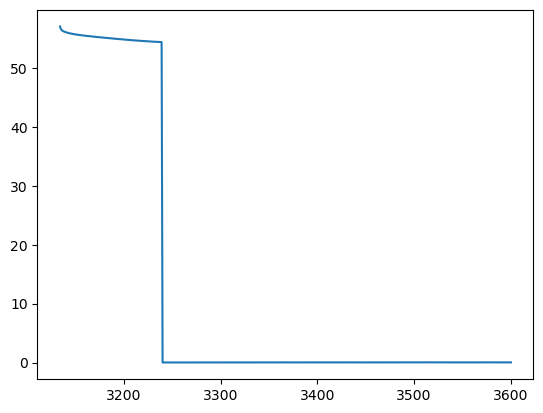

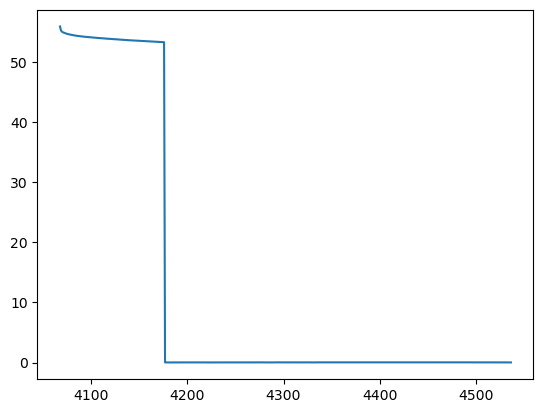

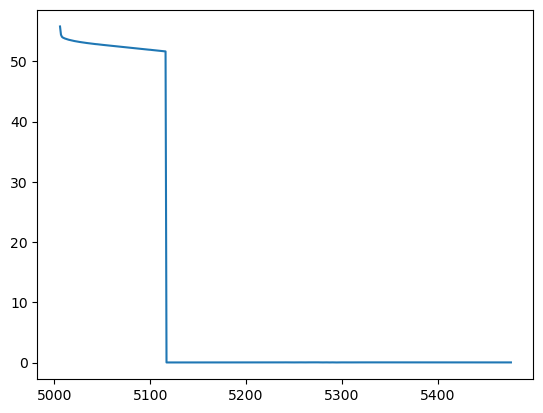

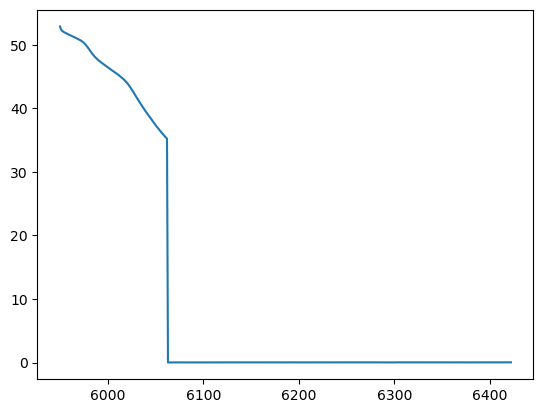

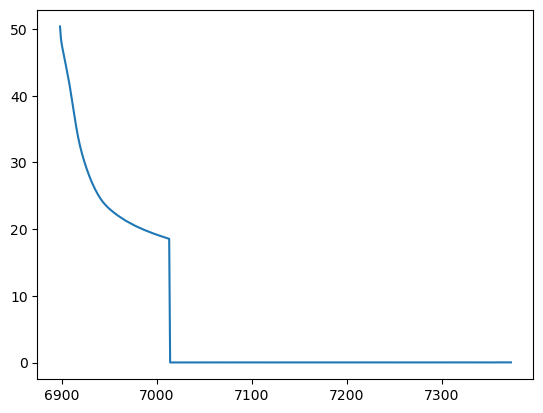

In [227]:
for k, (start, end) in enumerate(partitions):
    fig, ax = plt.subplots()
    if k == 0:
        ax.plot(data.iloc[0:end,2])
    else:
        ax.plot(data.iloc[start:end,2])